In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Data
df = pd.read_csv('score_updated.csv')

# 2. Ambil data X dan Y
# Penting: Scikit-Learn meminta data X (fitur) dalam bentuk 2 Dimensi (Matrix)
# Jadi kita harus ubah dari [2.5, 5.1, ...] menjadi [[2.5], [5.1], ...]
x = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values

print("Shape X:", x.shape)  # Harus (96, 1) atau (n_data, 1)
print("Shape Y:", y.shape)

Shape X: (96, 1)
Shape Y: (96,)


In [2]:
# Membuat objek model Linear Regression
model = LinearRegression()

# Melatih model dengan data (Training)
# Proses ini sama dengan mencari m dan c terbaik
model.fit(x, y)

# Mengambil nilai m (coefficient) dan c (intercept) dari hasil training
m_sklearn = model.coef_[0]
c_sklearn = model.intercept_

print(f"Slope (m) dari Scikit-Learn: {m_sklearn}")
print(f"Intercept (c) dari Scikit-Learn: {c_sklearn}")
print(f"Persamaan Garis: y = {c_sklearn:.2f} + {m_sklearn:.2f}x")

Slope (m) dari Scikit-Learn: 9.901318259246043
Intercept (c) dari Scikit-Learn: 1.8635766281174497
Persamaan Garis: y = 1.86 + 9.90x


In [3]:
# Prediksi untuk seluruh data x
y_pred_sklearn = model.predict(x)

print("Prediksi 5 data pertama:", y_pred_sklearn[:5])

Prediksi 5 data pertama: [26.61687228 52.36029975 33.54779506 86.02478183 36.51819054]


In [ ]:
# Menghitung metric evaluasi
mae = mean_absolute_error(y, y_pred_sklearn)
mse = mean_squared_error(y, y_pred_sklearn)
rmse = np.sqrt(mse)  # Sklearn tidak punya RMSE langsung, jadi kita akarkan MSE
r2 = r2_score(y, y_pred_sklearn)

print("Evaluasi Scikit-Learn")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

=== Evaluasi Scikit-Learn ===
MAE: 2.6041
MSE: 11.5402
RMSE: 3.3971
R² Score: 0.9814


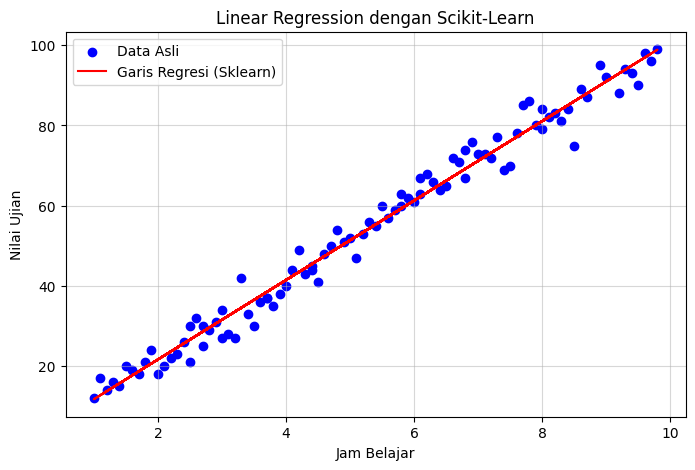

In [5]:
plt.figure(figsize=(8, 5))

# Plot Data Asli (Scatter biru)
plt.scatter(x, y, color='blue', label='Data Asli')

# Plot Garis Regresi (Garis merah)
plt.plot(x, y_pred_sklearn, color='red', label='Garis Regresi (Sklearn)')

plt.xlabel('Jam Belajar')
plt.ylabel('Nilai Ujian')
plt.title('Linear Regression dengan Scikit-Learn')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [7]:
# Prediksi nilai untuk 10 jam belajar
# Ingat: Input harus bentuk 2D array [[10]]
jam_belajar = np.array([[2]])

prediksi_baru = model.predict(jam_belajar)

print(f"Jika belajar 10 jam, prediksi nilainya: {prediksi_baru[0]:.2f}")

Jika belajar 10 jam, prediksi nilainya: 21.67
